In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/HP/spam_ham_dataset.csv')#df = data frame

In [4]:
df.shape

(5171, 4)

steps :
1. data clearing 
2. EDA 
3. Text preprocessing 
4. Modele building
5. Evaluation

#data clearing

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [14]:
#data have no values missing so we will continue

In [17]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
# as we need only spam and ham and text in the model so we will drop unnamed :0 and label_num

In [5]:
df.drop(columns=['label_num'], inplace=True)

In [57]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [62]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [22]:
# renaming the columns

In [7]:
df.rename(columns={'label':'target'},inplace=True)

In [64]:
df.head()

,target,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [26]:
# we have to put numbers in place of spam and ham 

In [8]:
from sklearn.preprocessing import LabelEncoder#used to convert text to numbers
encoder = LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [36]:
#assigning 0 to ham 1 to spam and again replacing it with target column

In [39]:
df.head()

,Unnamed: 0,target,text
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,4685,1,"Subject: photoshop , windows , office . cheap ..."
4,2030,0,Subject: re : indian springs\r\nthis deal is t...


In [10]:
#checking missing values
df.isnull().sum()#no missing values

target    0
text      0
dtype: int64

In [18]:
#then we will check for the duplicate values and then remove the duplicates

In [9]:
df.duplicated().sum()

178

In [11]:
df= df.drop_duplicates(keep='first')#deleting duplicates

In [12]:
df.duplicated().sum()

0

In [12]:
df.shape#new shape of data after clearing

(4993, 2)

In [14]:
#EDA

In [15]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [16]:
df['target'].value_counts()#checking how many are spam ar ham

0    3531
1    1462
Name: target, dtype: int64

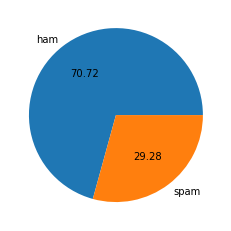

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct= "%0.2f")
plt.show()

In [54]:
#data is imbalanced

In [55]:
# now create new colums in which we will firstly get no of character in the emails, no of words in , and no of sentances in email

In [14]:
import nltk

In [ ]:
# downloading nltk package

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
df['num_characters']=df['text'].apply(len)#creating new column num_char and storint the length of the Email to it

In [19]:
df.head()

,target,text,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [63]:
# for num of words

In [11]:
df['num_word']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [79]:
#df['text'].apply(lambda x: nltk.word_tokenize(x)) is used to break the sentences into word by word list and to count the length we used len fuction

In [80]:
df.head()

,target,text,num_characters,num_word
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [23]:
#to count the sentances in email

In [12]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))#same as above difference is to count the sentances in email

In [22]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [19]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


In [28]:
#for ham emails
df[df['target']==0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,8.634259
std,1382.827493,332.179661,21.912879
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,5.000000
75%,1227.250000,294.000000,10.000000
max,32258.000000,8863.000000,1163.000000


In [31]:
#for spam
df[df['target']==1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,13.344229
std,1825.986210,346.821249,20.724178
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,3.000000
50%,576.000000,116.000000,7.000000
75%,1253.500000,244.000000,15.000000
max,22073.000000,3963.000000,331.000000


In [32]:
#we can see the difference in the mean values of ham and spam emails 

In [ ]:
#to see more clear picture we can plot histogram

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

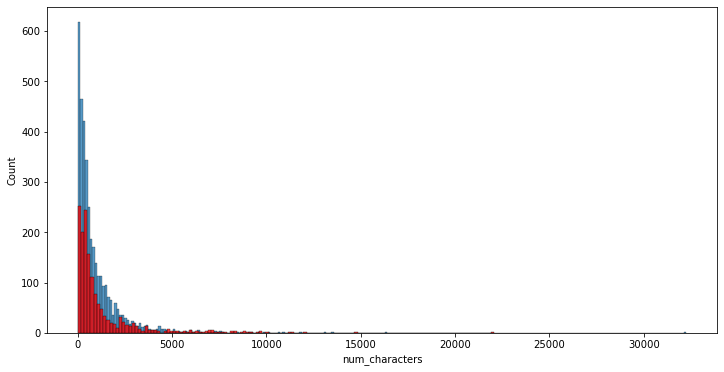

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')#just verifying above describe()

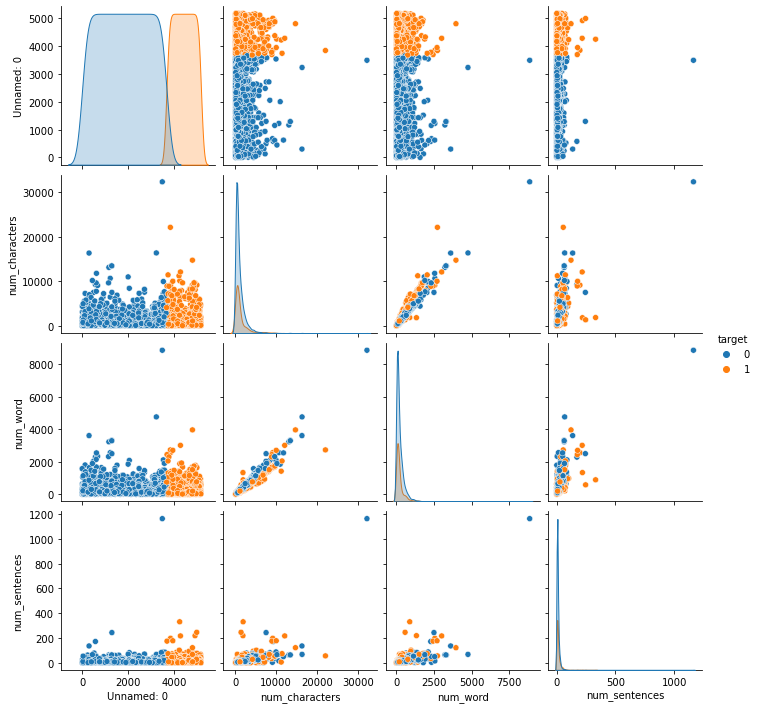

In [40]:
sns.pairplot(df,hue='target')

In [84]:
df.corr()

,target,num_characters,num_word,num_sentences
target,1.000000,0.074794,0.014425,0.098752
num_characters,0.074794,1.000000,0.970492,0.655812
num_word,0.014425,0.970492,1.000000,0.717001
num_sentences,0.098752,0.655812,0.717001,1.000000


<AxesSubplot:>

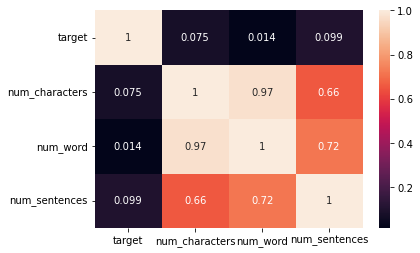

In [86]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing
1. lower case 
2. tokenization(breaking it into words) 
3. removing special character
4. removing stop words and punctuation(word which don't have any contribution in the model)
5. stemming(making different tenses of same words to one word only)


In [17]:
def transform_text(text):
    text = text.lower()#for lower case
    text = nltk.word_tokenize(text)#for tokenization
    y = []
    # here to remove special character we will write a for loop in text and check for alpha numeric values and storing it in y list
    for i in text:
        if i.isalnum():#if i is alpha numeric which means it will not take any special character
            y.append(i)
            
    text = y[:]
    y.clear()
    #to remove stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    # for stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [93]:
#now to get the stop word 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
#now to get the stop word which we have to remove are
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
#for punctuation
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#now for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [21]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [22]:
# checking the function
transform_text("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .")

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [23]:
df['transformed_text']= df['text'].apply(transform_text)

In [111]:
#int above we are applying the transform_text function to our data and storing in new column transformed_data

In [110]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [114]:
#now we will create a word cloud(highlights the important word in ham and spam)

In [117]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.1            |   py39hb82d6ee_2         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py39hb82d6ee_2

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.13.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1




conda-4

In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10, background_color='white')

In [121]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

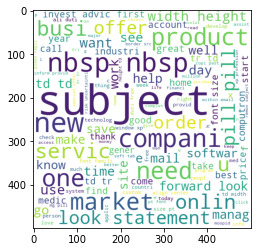

In [122]:
plt.imshow(spam_wc)

In [123]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

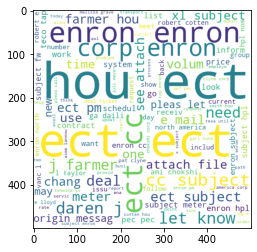

In [124]:
plt.imshow(ham_wc)

In [126]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [128]:
#now we have to get top 30 words of ham and spam

In [25]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [24]:
len(spam_corpus)

197452

In [26]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('subject', 1622),
 ('3', 1229),
 ('com', 989),
 ('http', 981),
 ('compani', 918),
 ('2', 853),
 ('price', 731),
 ('1', 710),
 ('0', 688),
 ('e', 632),
 ('www', 586),
 ('inform', 553),
 ('00', 550),
 ('get', 547),
 ('font', 515),
 ('email', 509),
 ('5', 506),
 ('td', 504),
 ('pleas', 503),
 ('secur', 499),
 ('statement', 497),
 ('4', 493),
 ('invest', 473),
 ('stock', 467),
 ('us', 466),
 ('product', 459),
 ('7', 451),
 ('time', 448),
 ('new', 427),
 ('may', 421)]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


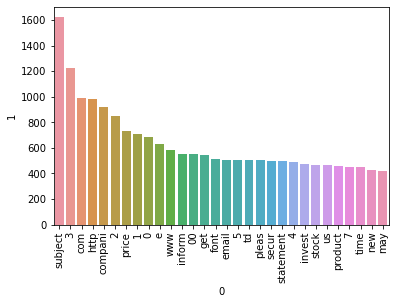

In [135]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [137]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


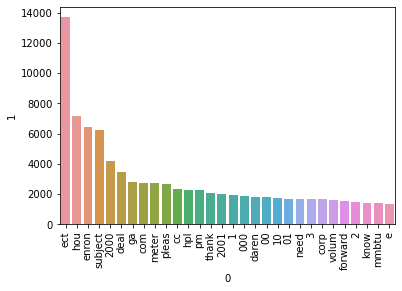

In [138]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [1]:
#end of data preprocessing

In [3]:
#Model making for maive bayes

In [33]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
#first we will vectorise the tarnsformed text

In [29]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X1 = cv.fit_transform(df['transformed_text']).toarray()

In [30]:
X.shape

(4993, 42592)

In [31]:
y =df['target'].values

In [44]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)#0.2 means 20% data is giving to model
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=2)

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [36]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()#using 3 naive bayes alogos to find the best one for the model

In [37]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1))

0.9409409409409409
[[669  28]
 [ 31 271]]
0.9063545150501672


In [41]:
gnb.fit(X1_train, y_train)
y_pred1 = gnb.predict(X1_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1))

0.9519519519519519
[[683  14]
 [ 34 268]]
0.950354609929078


In [39]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test,y_pred2))#it has best precision 

0.908908908908909
[[696   1]
 [ 90 212]]
0.9953051643192489


In [44]:
mnb.fit(X1_train, y_train)
y_pred2 = mnb.predict(X1_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test,y_pred2))

0.970970970970971
[[680  17]
 [ 12 290]]
0.9446254071661238


In [45]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test,y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


In [46]:
bnb.fit(X1_train, y_train)
y_pred3 = bnb.predict(X1_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test,y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


In [1]:
#tfidf = mnb has best precision

In [36]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [37]:
#for decision tree

In [42]:
#for svm

In [44]:
#for XG boost

In [47]:
conda install -c anaconda py-xgboost

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_2         156 KB  anaconda
    libxgboost-1.5.0           |       hd77b12b_1         2.3 MB  anaconda
    openssl-1.1.1n             |       h2bbff1b_0         5.8 MB  anaconda
    py-xgboost-1.5.0           |   py39haa95532_1         166 KB  anaconda
    ------------------------------------------------------------
                                           Total:         8.4 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost      

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

C:\Users\HP\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [48]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [40]:
conda install -c conda-forge r-tree


Solving environment: ...working... 
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - r-tree


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    libblas-3.9.0              |1_h8933c1f_netlib         193 KB  conda-forge
    liblapack-3.9.0            |5_hd5c7e75_netlib         2.7 MB  conda-forge
    m2w64-bwidget-1.9.10       |                2         155 KB  conda-forge
    

m2w64-tcl-8.6.5      | 3.7 MB    |            |   0% 
m2w64-tcl-8.6.5      | 3.7 MB    |            |   0% 
m2w64-tcl-8.6.5      | 3.7 MB    | 4          |   4% 
m2w64-tcl-8.6.5      | 3.7 MB    | ##3        |  24% 
m2w64-tcl-8.6.5      | 3.7 MB    | ###3       |  34% 
m2w64-tcl-8.6.5      | 3.7 MB    | ####4      |  44% 
m2w64-tcl-8.6.5      | 3.7 MB    | #####4     |  55% 
m2w64-tcl-8.6.5      | 3.7 MB    | ######5    |  66% 
m2w64-tcl-8.6.5      | 3.7 MB    | ########   |  81% 
m2w64-tcl-8.6.5      | 3.7 MB    | ########## | 100% 
m2w64-tcl-8.6.5      | 3.7 MB    | ########## | 100% 

m2w64-speex-1.2rc2   | 610 KB    |            |   0% 
m2w64-speex-1.2rc2   | 610 KB    | 2          |   3% 
m2w64-speex-1.2rc2   | 610 KB    | #######6   |  76% 
m2w64-speex-1.2rc2   | 610 KB    | ########## | 100% 

m2w64-pcre2-10.34    | 1.5 MB    |            |   0% 
m2w64-pcre2-10.34    | 1.5 MB    | 1          |   1% 
m2w64-pcre2-10.34    | 1.5 MB    | ####6      |  47% 
m2w64-pcre2-10.34    | 1.5

In [49]:
clfs = {
    'GaussianNB':gnb,
    'MultinomialNB':mnb,
    'BernoulliNB':bnb,
    'KNeighborsClassifier':knc,
    'LogisticRegression':lrc,
    'RandomForestClassifier':rfc,
    'AdaBoost':abc,
    'BaggingClassifier':bc,
    'ExtraTreesClassifier':etc,
    'GBDTGradientBoostingClassifier':gbdt,
    'DecisionTreeClassifier':dtc,
    'SVM':svc,
    'XGBClassifier':xgb
}

In [50]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [52]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1Score = f1_score(y_test,y_pred)
    return accuracy,precision,recall,f1Score

In [53]:
def train_classifier1(clf,X1_train,y_train,X1_test,y_test):
    clf.fit(X1_train,y_train)
    y_pred = clf.predict(X1_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1Score = f1_score(y_test,y_pred)
    return accuracy,precision,recall,f1Score

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.984984984984985, 0.9555555555555556, 0.9966887417218543, 0.9756888168557537)

In [55]:
train_classifier1(svc,X1_train,y_train,X1_test,y_test)

(0.8168168168168168,
 0.7117437722419929,
 0.6622516556291391,
 0.6861063464837049)

In [39]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,current_f1Score = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1-Score - ",current_f1Score)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1Score)

For  GaussianNB
Accuracy -  0.9516908212560387
Precision -  0.9023569023569024
Recall -  0.9273356401384083
F1-Score -  0.9146757679180888
For  MultinomialNB
Accuracy -  0.9227053140096618
Precision -  1.0
Recall -  0.7231833910034602
F1-Score -  0.8393574297188755
For  BernoulliNB
Accuracy -  0.851207729468599
Precision -  0.8813559322033898
Recall -  0.5397923875432526
F1-Score -  0.6695278969957081
For  KNeighborsClassifier
Accuracy -  0.9671497584541063
Precision -  0.9811320754716981
Recall -  0.8996539792387543
F1-Score -  0.9386281588447654
For  LogisticRegression
Accuracy -  0.966183574879227
Precision -  0.89937106918239
Recall -  0.9896193771626297
F1-Score -  0.942339373970346
For  RandomForestClassifier
Accuracy -  0.9855072463768116
Precision -  0.959731543624161
Recall -  0.9896193771626297
F1-Score -  0.9744463373083475
For  AdaBoost
Accuracy -  0.966183574879227
Precision -  0.9205298013245033
Recall -  0.9619377162629758
F1-Score -  0.9407783417935701
For  BaggingClass

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  XGBClassifier
Accuracy -  0.9748792270531401
Precision -  0.933993399339934
Recall -  0.9792387543252595
F1-Score -  0.956081081081081


In [57]:
accuracy_scores1=[]
precision_scores1=[]
recall_scores1=[]
f1_scores1=[]

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,current_f1Score = train_classifier(clf,X1_train,y_train,X1_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1-Score - ",current_f1Score)
    accuracy_scores1.append(current_accuracy)
    precision_scores1.append(current_precision)
    recall_scores1.append(current_recall)
    f1_scores1.append(current_f1Score)

For  GaussianNB
Accuracy -  0.9519519519519519
Precision -  0.950354609929078
Recall -  0.8874172185430463
F1-Score -  0.9178082191780823
For  MultinomialNB
Accuracy -  0.970970970970971
Precision -  0.9446254071661238
Recall -  0.9602649006622517
F1-Score -  0.9523809523809523
For  BernoulliNB
Accuracy -  0.8468468468468469
Precision -  0.8941798941798942
Recall -  0.5596026490066225
F1-Score -  0.6883910386965377
For  KNeighborsClassifier
Accuracy -  0.8448448448448449
Precision -  0.6666666666666666
Recall -  0.9735099337748344
F1-Score -  0.7913862718707941
For  LogisticRegression
Accuracy -  0.963963963963964
Precision -  0.9208860759493671
Recall -  0.9635761589403974
F1-Score -  0.9417475728155339
For  RandomForestClassifier
Accuracy -  0.972972972972973
Precision -  0.9508196721311475
Recall -  0.9602649006622517
F1-Score -  0.9555189456342669
For  AdaBoost
Accuracy -  0.938938938938939
Precision -  0.8801261829652997
Recall -  0.9238410596026491
F1-Score -  0.901453957996769
F

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  XGBClassifier
Accuracy -  0.9629629629629629
Precision -  0.9127725856697819
Recall -  0.9701986754966887
F1-Score -  0.9406099518459069


In [40]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall':recall_scores, 'F1-Score':f1_scores}).sort_values('Precision',ascending=False)

In [61]:
performance_df2=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores1,'Precision':precision_scores1, 'Recall':recall_scores1, 'F1-Score':f1_scores1}).sort_values('Precision',ascending=False)

In [41]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1-Score
1,MultinomialNB,0.922705,1.000000,0.723183,0.839357
3,KNeighborsClassifier,0.967150,0.981132,0.899654,0.938628
8,ExtraTreesClassifier,0.986473,0.962963,0.989619,0.976109
11,SVM,0.988406,0.960133,1.000000,0.979661
5,RandomForestClassifier,0.985507,0.959732,0.989619,0.974446
12,XGBClassifier,0.974879,0.933993,0.979239,0.956081
9,GBDTGradientBoostingClassifier,0.945894,0.929889,0.871972,0.900000
7,BaggingClassifier,0.958454,0.927083,0.923875,0.925477
6,AdaBoost,0.966184,0.920530,0.961938,0.940778
0,GaussianNB,0.951691,0.902357,0.927336,0.914676


In [62]:
performance_df2

,Algorithm,Accuracy,Precision,Recall,F1-Score
5,RandomForestClassifier,0.972973,0.950820,0.960265,0.955519
0,GaussianNB,0.951952,0.950355,0.887417,0.917808
8,ExtraTreesClassifier,0.975976,0.945513,0.976821,0.960912
1,MultinomialNB,0.970971,0.944625,0.960265,0.952381
4,LogisticRegression,0.963964,0.920886,0.963576,0.941748
12,XGBClassifier,0.962963,0.912773,0.970199,0.940610
7,BaggingClassifier,0.948949,0.911475,0.920530,0.915980
2,BernoulliNB,0.846847,0.894180,0.559603,0.688391
6,AdaBoost,0.938939,0.880126,0.923841,0.901454
9,GBDTGradientBoostingClassifier,0.937938,0.872671,0.930464,0.900641


In [42]:
performance_df1 = pd.melt(performance_df, id_vars= "Algorithm")

In [63]:
performance_df3 = pd.melt(performance_df2, id_vars= "Algorithm")

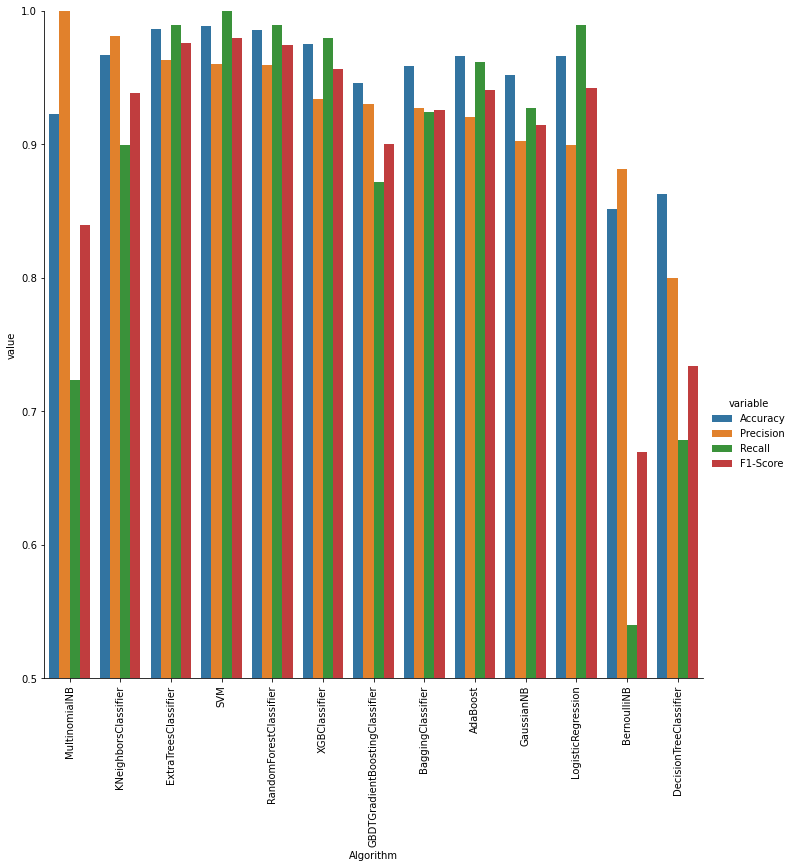

In [43]:
sns.catplot(x = 'Algorithm', y='value', hue='variable',data=performance_df1,kind='bar',height=10)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

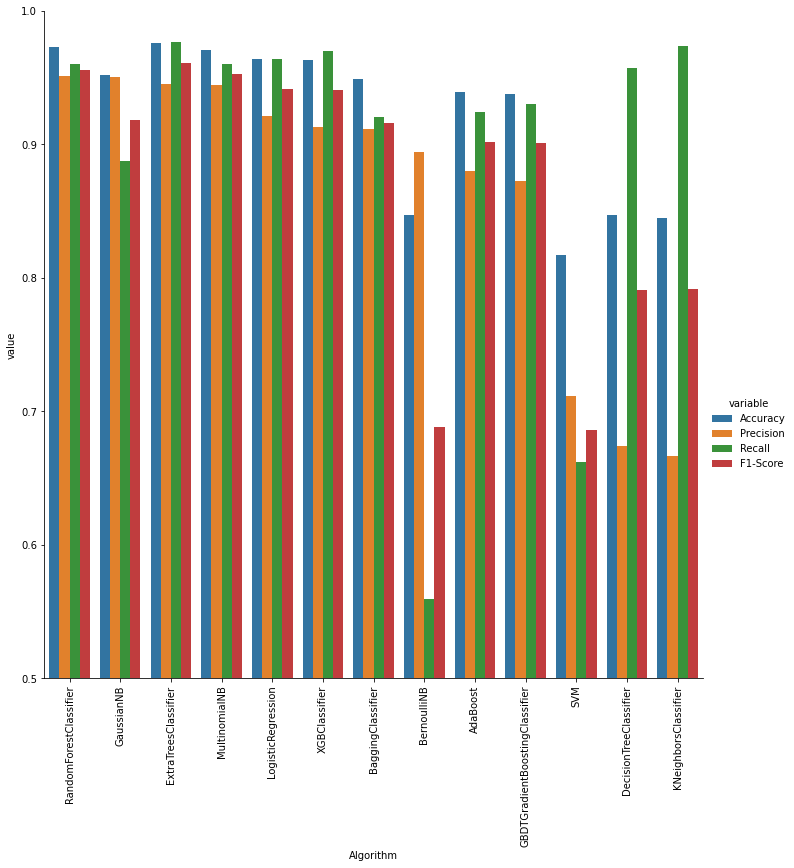

In [64]:
sns.catplot(x = 'Algorithm', y='value', hue='variable',data=performance_df3,kind='bar',height=10)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()